<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Geographic Data with Basemap

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
     |████████████████████████████████| 133.1MB 80kB/s 
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756169 sha256=f719273a97acfb483b242b41d17db082750276c0cc7ee1ca40a6b2b1aa3c9b25
  Stored in directory: /tmp/pip-ephem-wheel-cache-r_liydnh/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=f4bdd5f8503251d548f0ff7a4142d2a9bef336a7a8aa642f

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


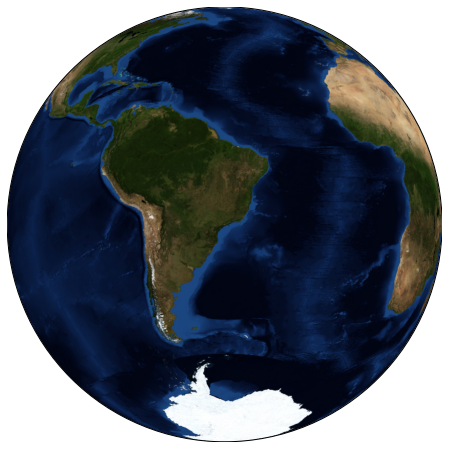

In [5]:
#show world map
plt.figure(figsize=(8, 8))
m = Basemap(projection= 'ortho', resolution=None, lat_0 = -23.6, lon_0=-46.6)
m.bluemarble(scale = 0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


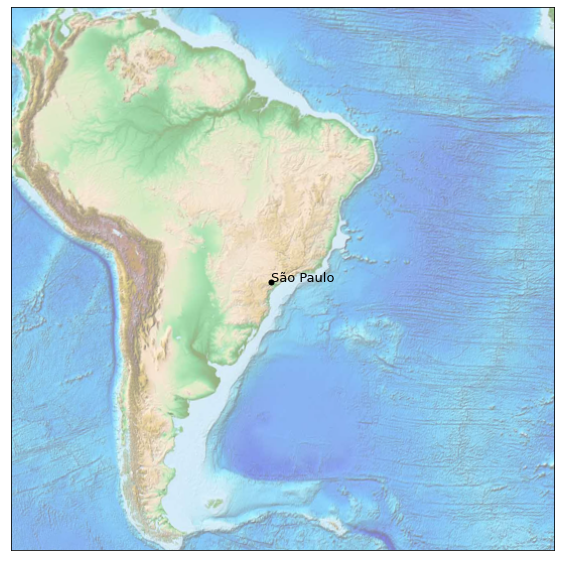

In [29]:
#São paulo
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0 = -23.6, lon_0=-46.6)
m.etopo(scale= 0.5, alpha = 0.5)

x, y = m(-48.3, -24)
plt.plot(x, y, 'ok', markersize = 5)
plt.text(x, y, 'São Paulo', fontsize = 13);

In [ ]:
#Map Projections
